### Fundamentos de Clustering

Clustering es un algoritmo no supervisado de Machine Learning, y consiste en encontrar las similitudes o características parecidas o similares entre puntos de datos para generar grupos o clusters, básicamente agrupar datos similares en conjuntos, revelando ciertos patrones y estructuras en los datos sin etiquetas predefinidas.

El objetivo principal del clustering es descubrir grupos o clústeres dentro de los datos, donde las muestras dentro de un mismo clúster son más similares entre sí que con las muestras de otros clústeres. Esto permite encontrar estructuras inherentes en los datos sin la necesidad de tener información previa sobre las clases o categorías a las que pertenecen.

El clustering tiene una amplia gama de aplicaciones en diversos campos, como el análisis de datos, la segmentación de clientes, el procesamiento de imágenes y la bioinformática. Al identificar grupos o patrones dentro de los datos, el clustering permite descubrir información valiosa, realizar segmentaciones significativas y obtener una mejor comprensión de los datos.

#### Primer clustering con scikit-learn


In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el conjunto de datos generado por la función make_blobs de scikit-learn para realizar nuestro primer clustering. Este conjunto de datos sintético nos permite experimentar con algoritmos de clustering y comprender la estructura de los clústeres.

La función make_blobs permite generar una cantidad finita de datos. Dónde:

* n_samples corresponde al número de datos a generar.
* centers corresponde al número de grupos a encontrar.
* n_features corresponde al número de carracterísticas encontradas en nuestro dataset de prueba.
* cluster_std corresponde a la desviación estándar y en este caso indica la distancia cercana de los datos frente a su centro.

Más información [haciendo click aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [3]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

A partir de aquí, utilizando la librería de pandas, se genera un dataframe unificando el dataset creado anteriormente.

In [4]:
df = pd.DataFrame({
    'x1' : x[:,0],
    'x2' : x[:,1],
    'y' : y
})

#### Generar una gráfica

La variable objetivo (Y) se utilizará únicamente para verificar la precisión de los resultados del clustering, ya que esta no es una tarea de clasificación, sino de agrupamiento o clusterización.

In [13]:
def plot_2d_clusters(x, y, ax):
    clusters = pd.Series(y).unique()
    for cluster in clusters:
        x[y==cluster].plot(
            title=f"{len(clusters)} Clusters",
            kind="scatter",
            x='x1',
            y='x2',
            marker= f'${cluster}$',
            ax=ax
        )

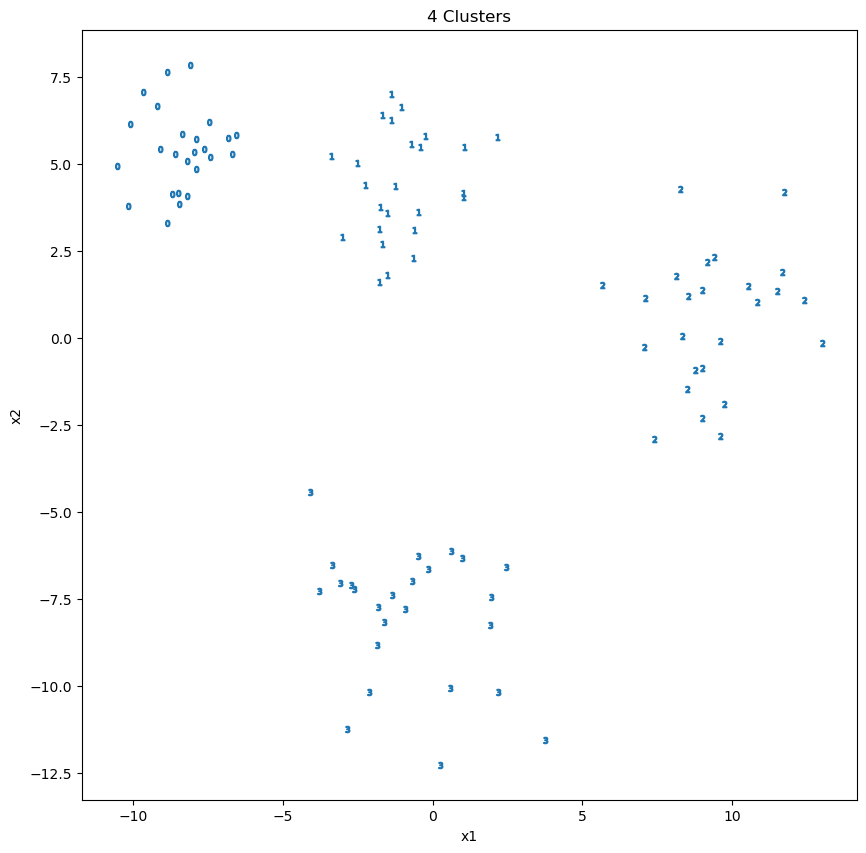

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
x, y = df[['x1', 'x2']], df['y']
plot_2d_clusters(x,y,ax)

Graficamos la dispersión de los datos del conjunto X para visualizar su distribución en el gráfico. El algoritmo no conoce los clústeres todavia, pero esto nos permite identificarlos visualmente de una forma sencilla a simple vista.

Ahora procederemos a escribir el código para realizar la clusterización.

#### Aplicar modelo de clusterización

La función KMeans de scikit-learn implementa el algoritmo K-Means para realizar la clusterización.

Funciona de manera iterativa asignando cada muestra al clúster más cercano y ajustando los centroides de los clústeres en función de las muestras asignadas. El objetivo es minimizar la suma de las distancias cuadradas entre las muestras y los centroides de sus clústeres correspondientes.

Puedes consultar su documentación haciendo [click aquí](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [18]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=4, random_state=7, n_init=10)

In [25]:
y_pred = kmeans.fit_predict(x)
y_pred

array([2, 3, 1, 2, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3, 0, 3, 1, 2, 1,
       1, 3, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 1,
       1, 2, 3, 2, 1, 3, 0, 0, 3, 2, 1, 2])

Text(0.5, 1.0, 'Predicción KMeans 4 Clusters')

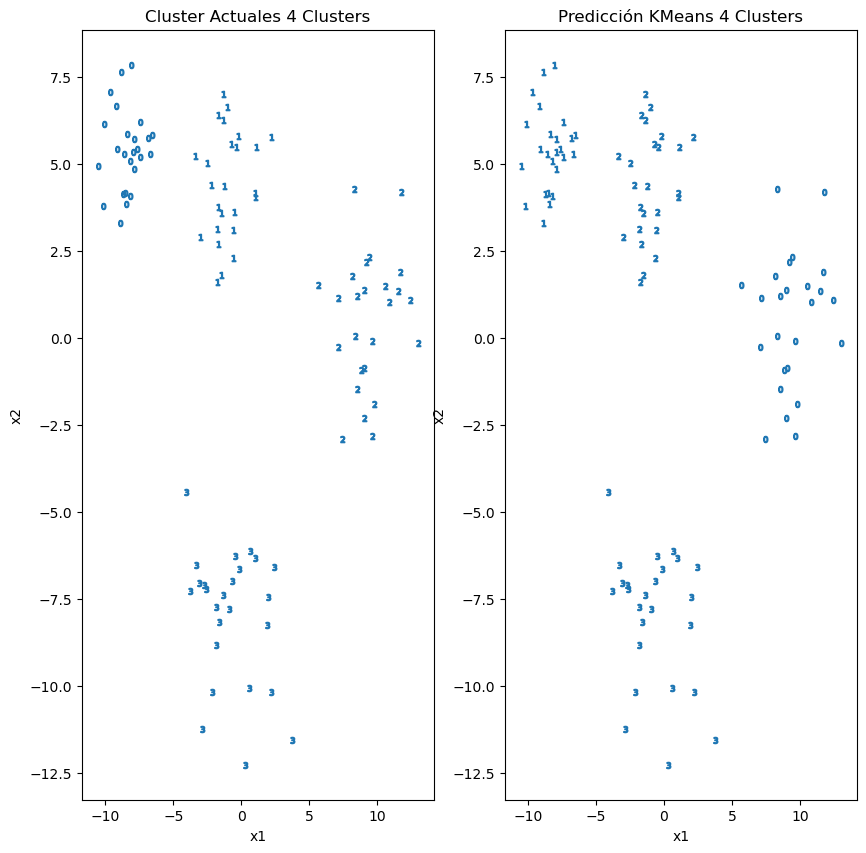

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plot_2d_clusters(x,y,ax[0])
plot_2d_clusters(x,y_pred,ax[1])
ax[0].set_title(f"Cluster Actuales {ax[0].get_title()}")
ax[1].set_title(f"Predicción KMeans {ax[1].get_title()}")

Nuestro modelo de clusterización ha segmentado correctamente los datos. No es necesario preocuparse por que las etiquetas de los clústeres en el gráfico actual no coincidan con las asignadas por el modelo KMeans. Lo importante es que los grupos hayan sido separados correctamente, ya que en el aprendizaje no supervisado no tenemos etiquetas predefinidas. La evaluación del rendimiento se basa en la coherencia y la calidad de la separación de los grupos, en lugar de las etiquetas específicas asignadas.

#### ¿Cuándo utilizar clustering?

* Obtener mayor contexto del dataset: este algoritmo es útil cuando se necesita una visión general sobre los datos para la determinación de patrones y ciertas estructuras que podrían no ser evidentes a simple vista. Además nos permite explorar y comprender la naturaleza de los datos.
* Detección de outliers: en estadística un outlier corresponde a cierto valor atípico en un conjunto de datos, esto significa que difieren significativamente del resto de datos y pueden determinar comportamientos anómalos y posibles errores. En la agrupación de datos, los outliers se pueden identificar como muestras que no se asignan a ningún clúster o simplemente como muestras en grupos solitarios o pequeños.
* Segmentación de datos para agrupar/clasificar sin variable objetivo: permite agrupar las muestras en función de su similitud y crear grupos coherentes sin necesidad de información externa. Es especialmente útil en casos donde se desea explorar la estructura subyacente de los datos y encontrar agrupaciones naturales sin tener una tarea de clasificación específica.
* Tareas manuales para la creación de etiquetas: el clustering puede ser utilizado en tareas donde se requiere crear etiquetas o categorías manualmente. Por ejemplo, en la organización de documentos o en la segmentación de clientes, se pueden utilizar algoritmos de clustering para agrupar los datos y luego asignar manualmente etiquetas o categorías a cada grupo. Esto facilita la tarea de clasificación y organización de los datos de manera más eficiente.

#### ¿Qué se puede lograr?

* Clasificación de contenido.
* Clasificación de tráfico de una página.
* Segmentación de clientes por su perfil.
* Identificar comportamientos fraudulentos.

#### Clasificación vs Clustering

* Clasificación cuenta con variable objetivo mientras que la clusterización no la necesita.
* En la clasificación se divide el conjunto de datos en dos subconjuntos de prueba y entrenamiento. En clustering, se trabaja con un solo set de datos.
* Clasificación consiste en asignar los datos a una determinada clase, mientras que clustering encuentra la similitud en los datos.
* En clasificación, se conoce la cantidad de clases. Mientras que en clusterización se desconoce la cantidad de grupos.

#### Evaluar modelos de clusterización

La evaluación de un modelo de clustering se realiza mediante métricas que miden la calidad de la agrupación y la coherencia de los resultados. Algunas de las métricas comunes para evaluar la calidad de un modelo de clustering son las siguientes:

##### Coeficiente de silueta

El coeficiente de silueta es una métrica popular para evaluar la calidad de un clustering. Calcula la distancia media entre una muestra y los otros puntos dentro de su propio clúster, en comparación con la distancia media entre la muestra y los puntos en el clúster más cercano. Un valor de coeficiente de silueta cercano a 1 indica una buena separación de los clústeres, mientras que un valor cercano a -1 indica que las muestras se han asignado incorrectamente. Un valor cercano a 0 sugiere superposición de clústeres.

s(i) = (b - a) / max(a, b)

Dónde:
* Para cada muestra, se calcula la distancia media (a) entre esa muestra y todas las demás muestras en el mismo clúster.
* Luego, se calcula la distancia media más cercana (b) entre esa muestra y todas las muestras en el clúster más cercano (distinto del clúster al que pertenece la muestra).
* El coeficiente de silueta para cada muestra se calcula utilizando la fórmula: silueta=(b−a)/max(a,b). El coeficiente de silueta varía en el rango de -1 a 1, donde un valor más alto indica una mejor separación entre los clústeres y una asignación más adecuada de las muestras.
* Finalmente, se calcula el coeficiente de silueta promedio para todo el conjunto de datos, tomando el promedio de los coeficientes de silueta individuales.

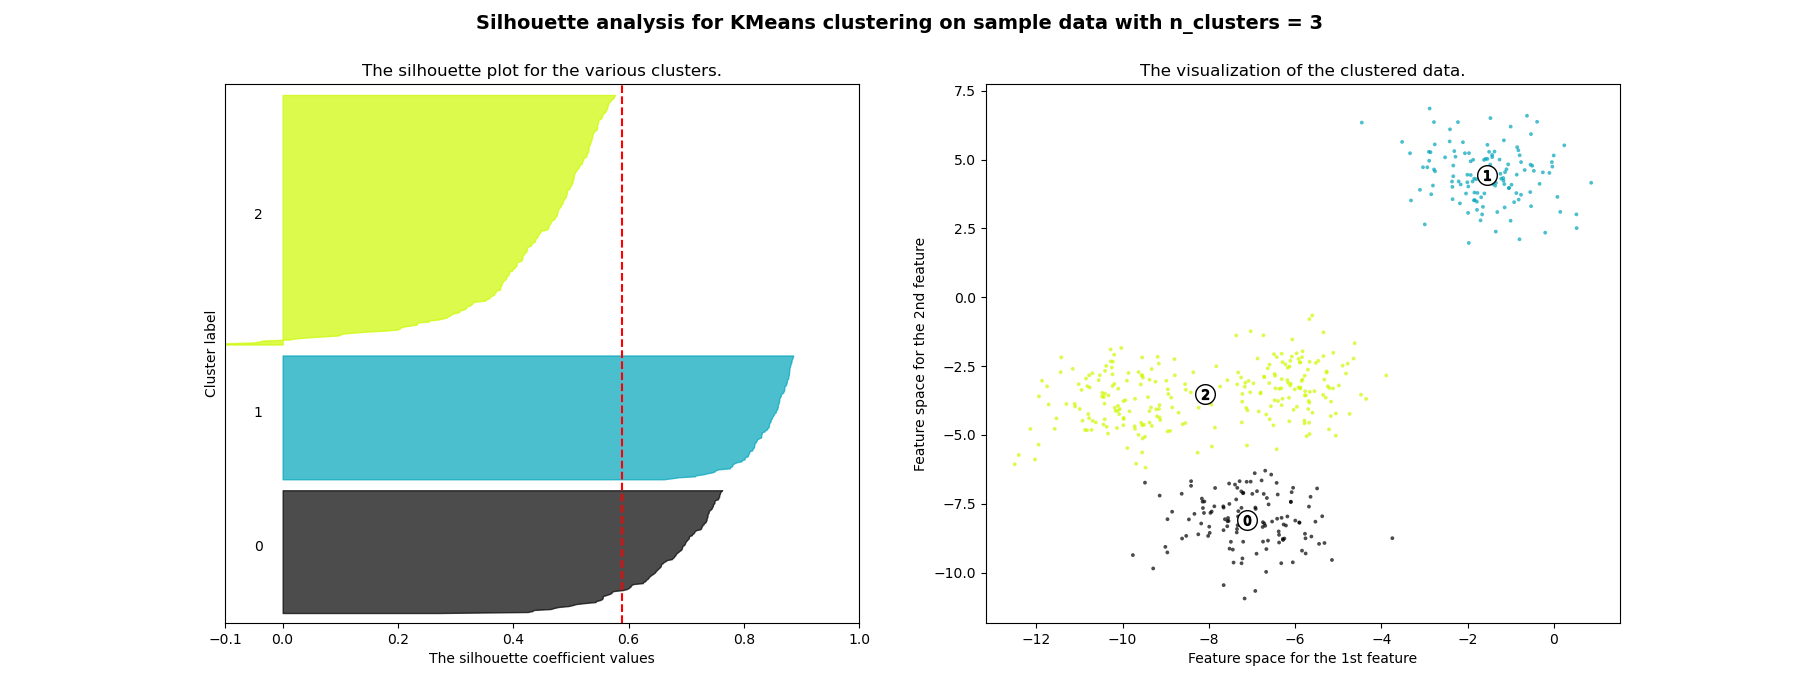
